# Heart Attack Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning ML Modelling

# Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.

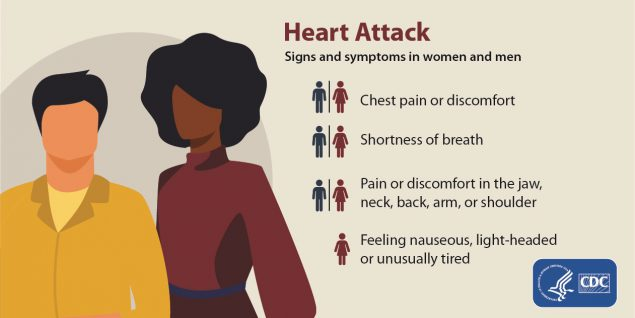

# Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10.[Swarm Plot Analysis](#10)
11.[Cat Plot Analysis](#11)
12.[Correlation Analysis](#12)
13.[Outlier Detection](#13)

<a id="1"></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id="2"></a>
## Data Content
* Age: Age of the patient
* Sex: Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp: Chest Pain type chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps: resting blood pressure (in mm Hg)
* chol: cholestoral in mg/dl fetched via BMI sensor
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* target: 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section we read heart.cv

In [2]:
# read data
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
## Missing Value Analysis

In [6]:
df.isnull().sum()
# there is not missing values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="5"></a>
## Unique Value Analysis
* Analyzing the unique type of values in the data set

In [7]:
for i in list(df.columns):
    print("{} -- {}".format(i,df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id="6"></a>
## Categorical Feature Analysis

<Figure size 640x480 with 0 Axes>

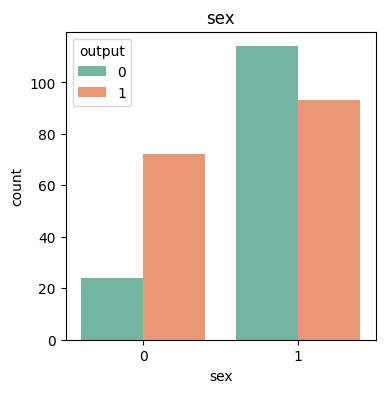

<Figure size 640x480 with 0 Axes>

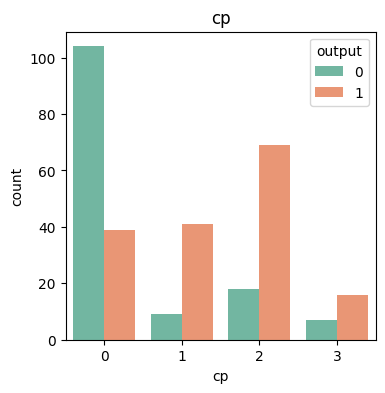

<Figure size 640x480 with 0 Axes>

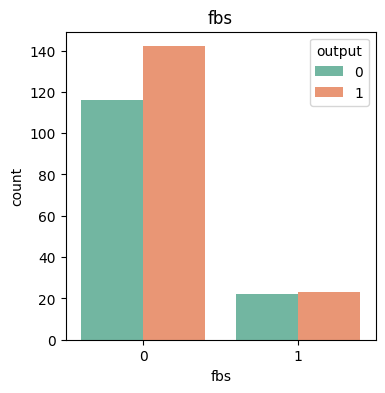

<Figure size 640x480 with 0 Axes>

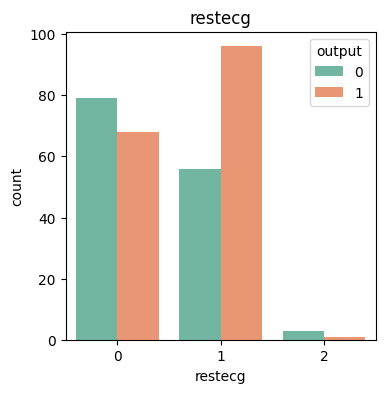

<Figure size 640x480 with 0 Axes>

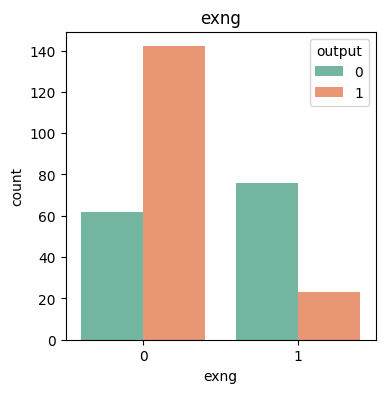

<Figure size 640x480 with 0 Axes>

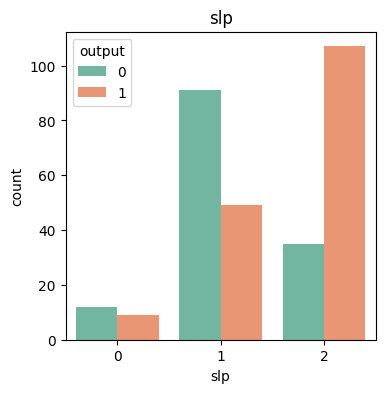

<Figure size 640x480 with 0 Axes>

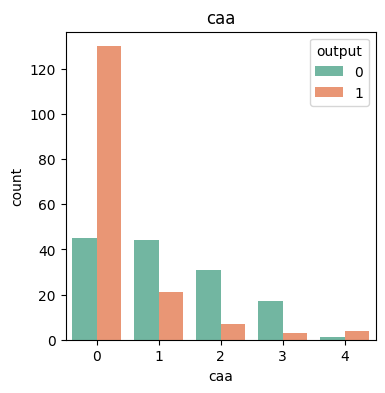

<Figure size 640x480 with 0 Axes>

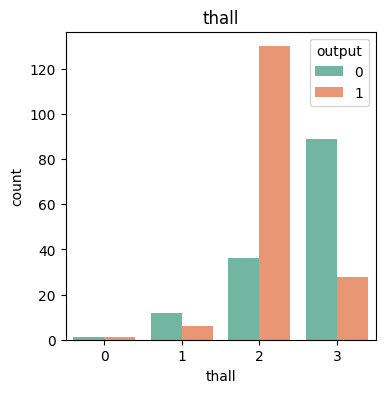

<Figure size 640x480 with 0 Axes>

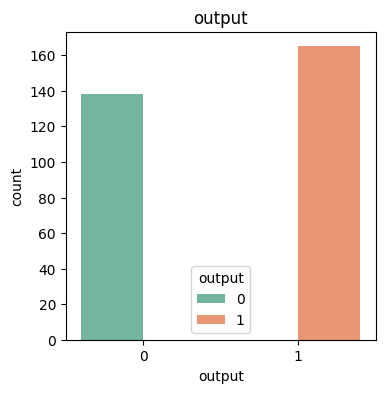

In [8]:
categorical_list=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    dims = (4,4)
    fig, ax = plt.subplots(figsize=dims)
    sns.countplot(x=i,data=df_categoric,hue="output",palette = "Set2",)
    plt.title(i)

<a id="7"></a>
## Numeric Feature Analysis

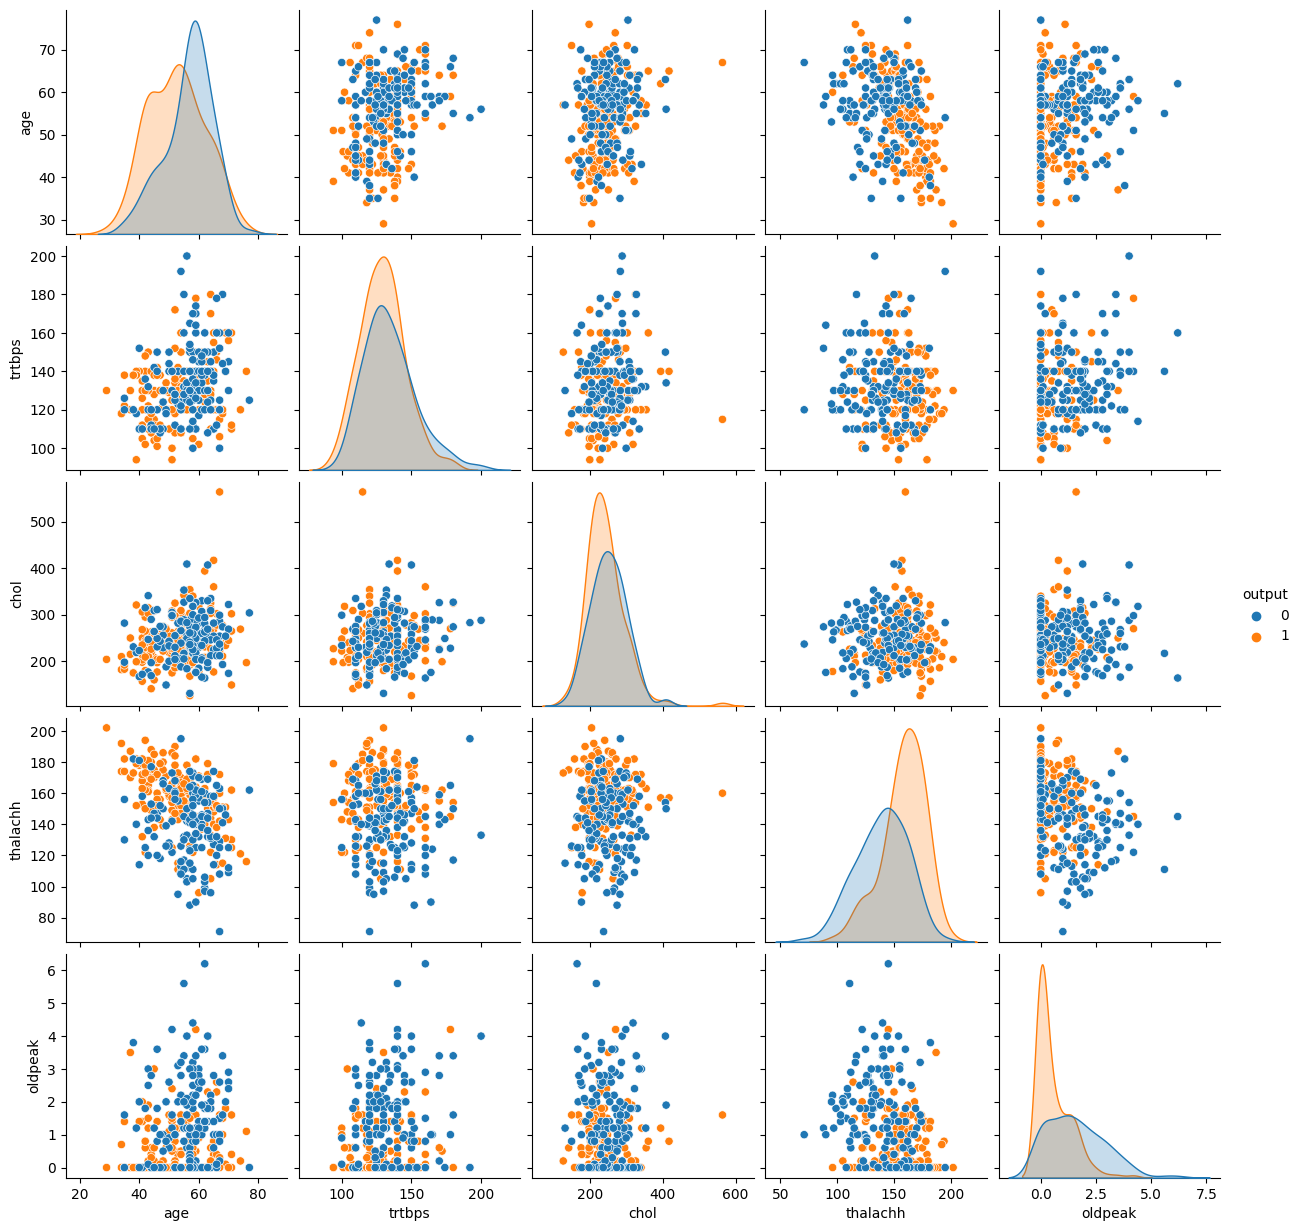

In [9]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak","output"]
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output",diag_kind="kde")
plt.show()

<a id="8"></a>
## Standardization

In [10]:
scaler=StandardScaler()
scaler


StandardScaler()

In [11]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [12]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


<a id="9"></a>
## Box Plot Analysis

In [13]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy=pd.concat([df_dummy,df.loc[:,"output"]],axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [14]:
data_melted=pd.melt(df_dummy,id_vars="output",var_name="features",value_name="value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


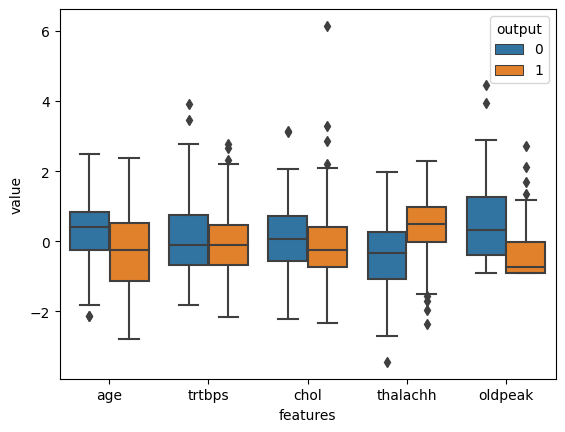

In [15]:
### Box Plot
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

<a id="10"></a>
## Swarm Plot Analysis

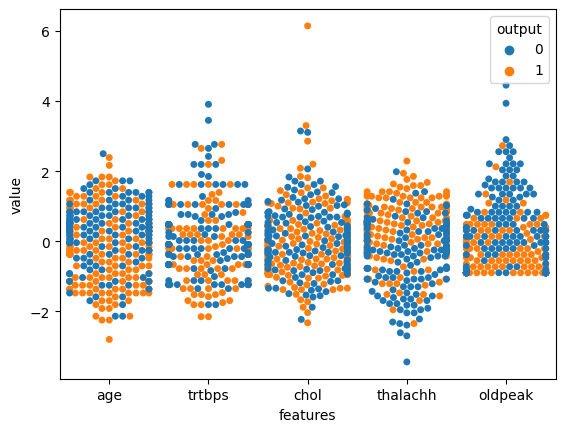

In [16]:
### Swarm Plot
plt.figure()
sns.swarmplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

<Figure size 400x500 with 0 Axes>

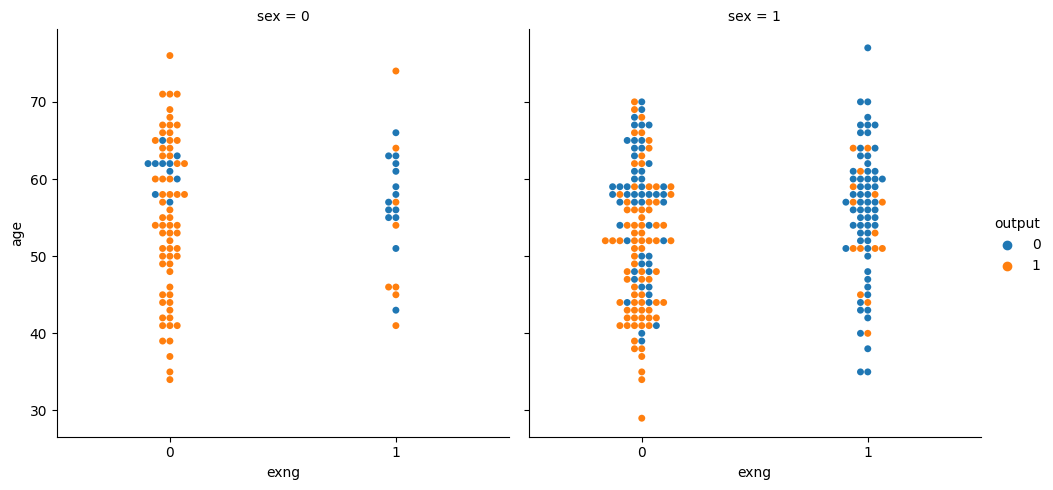

In [17]:
plt.figure(figsize=(4,5))
sns.catplot(x="exng",y="age",hue="output",col="sex",kind="swarm",data=df)
plt.show()

<a id="12"></a>
## Correlation Analysis

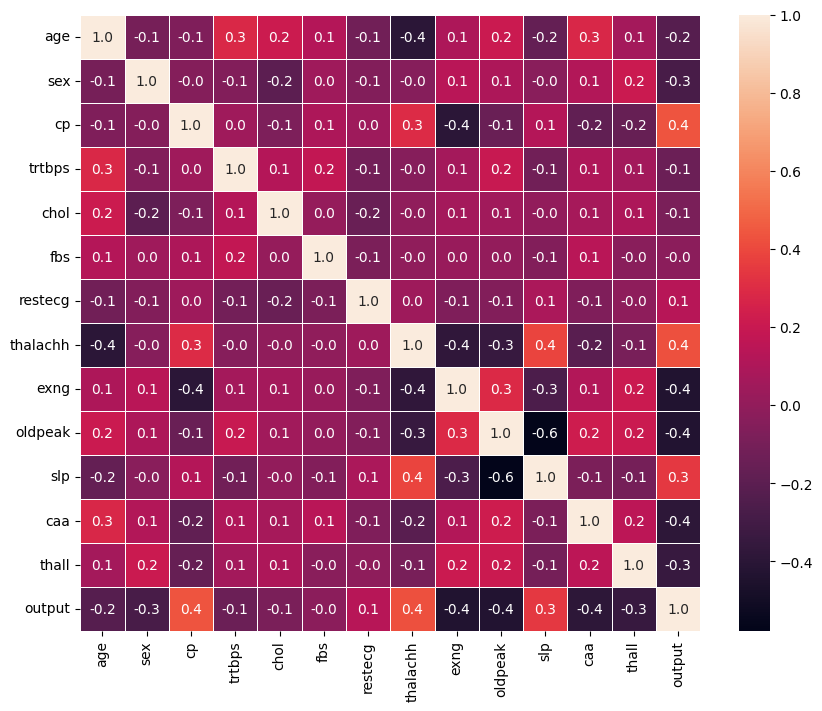

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=.6)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outlier can disrupt ML process

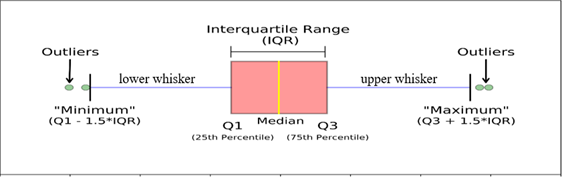

In [19]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [20]:
for i in numeric_list:
    #IQR
    Q1=np.percentile(df.loc[:,i],25)
    Q3=np.percentile(df.loc[:,i],75)
    IQR=Q3-Q1
    print("Old Shape: ",df.loc[:,i].shape)
    
    #upper bound
    upper=np.where(df.loc[:,i]>=(Q3+2.5*IQR))
    #lower bound
    lower=np.where(df.loc[:,i]<=(Q1-2.5*IQR))
    
    print("{} --- {}".format(upper,lower))
    try:
        df.drop(upper[0],inplace=True)
        
    except: print("KeyError: {} not found in axis".format(upper[0]))
        
    try:   
        df.drop(lower[0],inplace=True)
    except: print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New Shape: ",df.shape)

Old Shape:  (303,)
(array([], dtype=int64),) --- (array([], dtype=int64),)
New Shape:  (303, 14)
Old Shape:  (303,)
(array([223, 248]),) --- (array([], dtype=int64),)
New Shape:  (301, 14)
Old Shape:  (301,)
(array([85]),) --- (array([], dtype=int64),)
New Shape:  (300, 14)
Old Shape:  (300,)
(array([], dtype=int64),) --- (array([], dtype=int64),)
New Shape:  (300, 14)
Old Shape:  (300,)
(array([203, 220]),) --- (array([], dtype=int64),)
New Shape:  (298, 14)
